<a href="https://colab.research.google.com/github/dominikblaszczykiewicz/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import os, datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

from skimage import color, exposure

from sklearn.metrics import accuracy_score

%load_ext tensorboard

In [3]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/dw_matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/dw_matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
len(np.unique(y_train))

43

In [6]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [7]:
y_train[0]

41

In [8]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [10]:
to_categorical(y_train)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [11]:
y_train.ndim

1

In [0]:
if y_train.ndim ==1: y_train = to_categorical(y_train)
if y_test.ndim ==1: y_test = to_categorical(y_test)

In [13]:
y_train.shape

(34799, 43)

In [14]:
X_train.shape

(34799, 32, 32, 3)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [16]:
model = Sequential([
   Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = input_shape),

   Flatten(),

   Dense(units = num_classes, activation='softmax'),                
])

# model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 5s 4ms/step - loss: 5.8289 - accuracy: 0.7872


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = input_shape),

    Flatten(),

    Dense(units = num_classes, activation='softmax'),                
  ])
  
def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  
  model.fit(
      X_train, 
      y_train,
      batch_size = params_fit.get('batch_size', 128),
      epochs = params_fit.get('epochs',5),
      verbose = params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data',(X_train, y_train)),
      callbacks = [tensorboard_callback]
      )
  
  return model

In [18]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 44.3871 - accuracy: 0.7513 - val_loss: 0.2776 - val_accuracy: 0.9392
Epoch 2/5
272/272 [==============================] - 4s 16ms/step - loss: 0.2148 - accuracy: 0.9526 - val_loss: 0.1286 - val_accuracy: 0.9670
Epoch 3/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1663 - accuracy: 0.9634 - val_loss: 0.1008 - val_accuracy: 0.9756
Epoch 4/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1160 - accuracy: 0.9753 - val_loss: 0.1062 - val_accuracy: 0.9791
Epoch 5/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1246 - accuracy: 0.9752 - val_loss: 0.0721 - val_accuracy: 0.9821


In [19]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[1.6940451e-11, 1.0891343e-05, 1.4897593e-05, ..., 2.0615626e-06,
        4.6737310e-02, 9.8645905e-05],
       [2.5295559e-09, 1.6830729e-06, 1.2609987e-04, ..., 1.9817985e-06,
        9.4294137e-07, 6.8653758e-06],
       [1.7814436e-11, 4.3220530e-06, 4.4091081e-05, ..., 1.1303253e-05,
        3.1645589e-02, 4.6395004e-04],
       ...,
       [2.3025203e-02, 2.1894488e-02, 2.0413196e-02, ..., 8.9881022e-04,
        1.4037457e-02, 2.3683559e-02],
       [2.6885781e-03, 6.0839979e-03, 4.3861610e-03, ..., 4.0174185e-04,
        4.0805629e-03, 2.2890298e-03],
       [2.1972231e-04, 2.7200284e-03, 2.2878610e-03, ..., 9.8276199e-05,
        3.2744522e-03, 4.5229757e-04]], dtype=float32)

In [20]:
y_pred_prob[400]

array([1.15190260e-05, 9.99674916e-01, 4.10526268e-13, 1.33565617e-10,
       3.13549739e-04, 6.69594913e-13, 6.24734317e-15, 8.48351809e-23,
       1.46896332e-11, 6.80458252e-18, 1.47486618e-24, 5.06597319e-15,
       3.85041922e-22, 2.84497090e-14, 1.48783284e-19, 1.09936244e-13,
       4.82661701e-14, 1.95144235e-26, 1.17836272e-16, 5.43461719e-32,
       7.31771420e-23, 2.72048474e-18, 3.47631766e-32, 4.30677507e-29,
       4.45609342e-24, 8.42924994e-25, 5.96634333e-18, 1.17219928e-29,
       3.11677724e-12, 1.36544174e-20, 1.37130824e-21, 7.42970266e-20,
       1.03556756e-22, 3.31880876e-17, 2.79520182e-21, 1.84360916e-20,
       0.00000000e+00, 1.56345958e-25, 8.42579198e-37, 7.50266593e-29,
       9.98415488e-27, 1.00521075e-25, 1.09932900e-28], dtype=float32)

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [22]:
labels_dict[ np.argmax(y_pred_prob[400]) ]

'Speed limit (30km/h)'

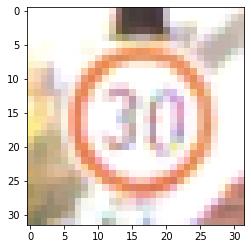

In [23]:
plt.imshow(X_test[400]);

<BarContainer object of 43 artists>

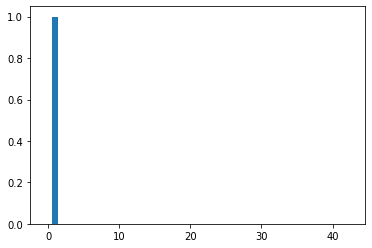

In [24]:
plt.bar(range(43), y_pred_prob[400])
#prawdopodobieństwo do jakiej grupy należy znak powyżej

In [0]:
# omt po check

def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

# **DALEJ WPROWADZAMY INŻYNIERIĘ MODELI ML**

In [26]:
predict(model_trained, X_test, y_test)

0.8315192743764173

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [28]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),
    Dense(units = num_classes, activation='softmax'),                
  ])


train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 4.9316 - accuracy: 0.3138 - val_loss: 0.9901 - val_accuracy: 0.7574
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.9490 - accuracy: 0.7171 - val_loss: 0.3446 - val_accuracy: 0.9259
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.5339 - accuracy: 0.8384 - val_loss: 0.1932 - val_accuracy: 0.9624
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3694 - accuracy: 0.8897 - val_loss: 0.1021 - val_accuracy: 0.9733
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2860 - accuracy: 0.9140 - val_loss: 0.0838 - val_accuracy: 0.9840


0.8943310657596372

In [29]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),
    Dense(units = num_classes, activation='softmax'),                
  ])


train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 19ms/step - loss: 2.4989 - accuracy: 0.4902 - val_loss: 0.3509 - val_accuracy: 0.9120
Epoch 2/5
272/272 [==============================] - 5s 18ms/step - loss: 0.4626 - accuracy: 0.8675 - val_loss: 0.0990 - val_accuracy: 0.9780
Epoch 3/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2619 - accuracy: 0.9236 - val_loss: 0.0524 - val_accuracy: 0.9868
Epoch 4/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1893 - accuracy: 0.9453 - val_loss: 0.0364 - val_accuracy: 0.9905
Epoch 5/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1341 - accuracy: 0.9598 - val_loss: 0.0194 - val_accuracy: 0.9954


0.9659863945578231

In [30]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),
    Dense(units = num_classes, activation='softmax'),                
  ])


get_cnn_v4(input_shape, num_classes).summary()
# train_and_predict(get_cnn_v4(input_shape, num_classes))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

In [31]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),
    Dense(units = num_classes, activation='softmax'),                
  ])


train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 6s 22ms/step - loss: 3.0456 - accuracy: 0.2210 - val_loss: 1.3535 - val_accuracy: 0.5738
Epoch 2/5
272/272 [==============================] - 6s 21ms/step - loss: 1.0598 - accuracy: 0.6730 - val_loss: 0.3043 - val_accuracy: 0.9176
Epoch 3/5
272/272 [==============================] - 6s 21ms/step - loss: 0.4810 - accuracy: 0.8509 - val_loss: 0.1119 - val_accuracy: 0.9678
Epoch 4/5
272/272 [==============================] - 6s 20ms/step - loss: 0.3107 - accuracy: 0.9022 - val_loss: 0.0870 - val_accuracy: 0.9767
Epoch 5/5
272/272 [==============================] - 6s 21ms/step - loss: 0.2324 - accuracy: 0.9287 - val_loss: 0.0457 - val_accuracy: 0.9874


0.9616780045351474

In [32]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),

    Dense(units = num_classes, activation='softmax'),                
  ])

# get_cnn_v5((32,32,1), num_classes).summary()
train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 6s 22ms/step - loss: 3.0055 - accuracy: 0.2288 - val_loss: 1.3369 - val_accuracy: 0.5617
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 1.1298 - accuracy: 0.6366 - val_loss: 0.3415 - val_accuracy: 0.8920
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.5255 - accuracy: 0.8338 - val_loss: 0.1301 - val_accuracy: 0.9641
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.3120 - accuracy: 0.9047 - val_loss: 0.0664 - val_accuracy: 0.9810
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2241 - accuracy: 0.9324 - val_loss: 0.0470 - val_accuracy: 0.9876


0.9625850340136054

In [33]:
X_train[0].shape

(32, 32, 3)

In [34]:
color.rgb2gray(X_train[0]).shape

(32, 32)

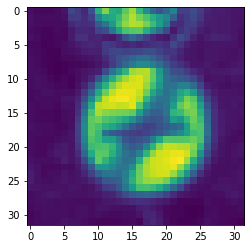

In [35]:
plt.imshow(color.rgb2gray(X_train[0]))

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [37]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.8499 - accuracy: 0.2021 - val_loss: 1.0226 - val_accuracy: 0.6794
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.6382 - accuracy: 0.7876 - val_loss: 0.1499 - val_accuracy: 0.9516
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2653 - accuracy: 0.9138 - val_loss: 0.0592 - val_accuracy: 0.9852
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1785 - accuracy: 0.9445 - val_loss: 0.0483 - val_accuracy: 0.9856
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1315 - accuracy: 0.9584 - val_loss: 0.0258 - val_accuracy: 0.9933


0.9707482993197278

In [38]:
def get_cnn_v6(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.4),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),

    Dense(units = num_classes, activation='softmax'),                
  ])

# get_cnn_v6((32,32,1), num_classes).summary()
model = get_cnn_v6((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 12s 42ms/step - loss: 3.0866 - accuracy: 0.1564 - val_loss: 1.2032 - val_accuracy: 0.6390
Epoch 2/5
272/272 [==============================] - 11s 40ms/step - loss: 0.6198 - accuracy: 0.8018 - val_loss: 0.1126 - val_accuracy: 0.9658
Epoch 3/5
272/272 [==============================] - 11s 40ms/step - loss: 0.2132 - accuracy: 0.9335 - val_loss: 0.0481 - val_accuracy: 0.9855
Epoch 4/5
272/272 [==============================] - 11s 40ms/step - loss: 0.1255 - accuracy: 0.9611 - val_loss: 0.0283 - val_accuracy: 0.9920
Epoch 5/5
272/272 [==============================] - 11s 40ms/step - loss: 0.0982 - accuracy: 0.9695 - val_loss: 0.0257 - val_accuracy: 0.9922


0.9571428571428572

In [39]:
def get_cnn_v7(input_shape, num_classes):
    return Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.4),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),

    Dense(units = 1024, activation='relu'),  
    Dropout(0.3),

    Dense(units = num_classes, activation='softmax'),                
  ])

# get_cnn_v7((32,32,1), num_classes).summary()
model = get_cnn_v7((32,32,1), num_classes)
params_fit = {
    'epochs': 10
}
model_trained = train_model(model, X_train_gray, y_train, params_fit)
predict(model_trained, X_test_gray, y_test)

Epoch 1/10
272/272 [==============================] - 11s 41ms/step - loss: 2.9072 - accuracy: 0.2018 - val_loss: 0.5761 - val_accuracy: 0.8307
Epoch 2/10
272/272 [==============================] - 11s 40ms/step - loss: 0.3958 - accuracy: 0.8734 - val_loss: 0.0726 - val_accuracy: 0.9770
Epoch 3/10
272/272 [==============================] - 11s 40ms/step - loss: 0.1614 - accuracy: 0.9502 - val_loss: 0.0366 - val_accuracy: 0.9889
Epoch 4/10
272/272 [==============================] - 11s 40ms/step - loss: 0.1077 - accuracy: 0.9665 - val_loss: 0.0234 - val_accuracy: 0.9930
Epoch 5/10
272/272 [==============================] - 11s 40ms/step - loss: 0.0760 - accuracy: 0.9770 - val_loss: 0.0098 - val_accuracy: 0.9972
Epoch 6/10
272/272 [==============================] - 11s 40ms/step - loss: 0.0647 - accuracy: 0.9804 - val_loss: 0.0117 - val_accuracy: 0.9968
Epoch 7/10
272/272 [==============================] - 11s 40ms/step - loss: 0.0599 - accuracy: 0.9820 - val_loss: 0.0107 - val_accuracy:

0.9696145124716553

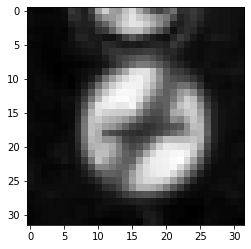

In [40]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'));